In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from patsy.builtins import *
from statsmodels.iolib.summary2 import summary_col


In [2]:
esg2014 = pd.read_csv('sp_500_esg_scores_2014.csv')
esg2015 = pd.read_csv('sp_500_esg_scores_2015.csv')
esg2016 = pd.read_csv('sp_500_esg_scores_2016.csv')
esg2017 = pd.read_csv('sp_500_esg_scores_2017.csv')
esg2018 = pd.read_csv('sp_500_esg_scores_2018.csv')

In [3]:
#removes firms from financial sectors as a leverage level that is normal for a financial firm could be a sign of distress for a non financial firm. 
allFirm = pd.read_csv('sp_500_sector.csv')
#combine esg dataframes with their sectors to remove data not used.
esg2014['GICS Sector Name'] = allFirm['GICS Sector Name']
esg2015['GICS Sector Name'] = allFirm['GICS Sector Name']
esg2016['GICS Sector Name'] = allFirm['GICS Sector Name']
esg2017['GICS Sector Name'] = allFirm['GICS Sector Name']
esg2018['GICS Sector Name'] = allFirm['GICS Sector Name']
esg2014 = esg2014[esg2014['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
esg2015 = esg2015[esg2015['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
esg2016 = esg2016[esg2016['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
esg2017 = esg2017[esg2017['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
esg2018 = esg2018[esg2018['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
filteredFirms = allFirm
filteredFirms = filteredFirms[filteredFirms['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
esg2014


,Unnamed: 0,Instrument,CSR Sustainability Reporting,ESG Reporting Scope,ESG Combined Score,ESG Score,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score,ESG Controversies Score,GICS Sector Name
0,0,MMM,True,100.0,73.331774,89.996881,84.196906,95.772184,89.102602,56.666667,Industrials
1,1,AOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials
2,2,ABT,True,100.0,58.510167,73.542074,50.231026,83.162813,71.753256,43.478261,Health Care
3,3,ABBV.K,True,100.0,61.332762,61.332762,55.886965,70.205218,52.066955,90.000000,Health Care
4,4,ABMD.O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health Care
...,...,...,...,...,...,...,...,...,...,...,...
431,497,XYL,True,100.0,61.188610,61.188610,62.524965,57.713043,64.141838,100.000000,Industrials
432,498,YUM,True,100.0,43.779548,61.368620,66.983899,82.352479,24.839081,26.190476,Consumer Discretionary
433,499,ZBRA.O,False,NaN,25.593094,25.593094,4.059829,43.264636,34.442170,100.000000,Information Technology
434,500,ZBH,False,NaN,40.851195,40.851195,51.302833,29.240506,51.261170,100.000000,Health Care


In [4]:
#esgScores.columns = ['Instrument','2014','2015','2016','2017','2018']
#esgScores['Instrument'] = 
esgScores = pd.DataFrame(columns = ['Instrument','2014','2015','2016','2017','2018'])
esgScores['Instrument'] = filteredFirms['Instrument']
for i in esgScores.index:
    esgScores.at[i,'2014'] = esg2014.at[i,'ESG Score']
    esgScores.at[i,'2015'] = esg2015.at[i,'ESG Score']
    esgScores.at[i,'2016'] = esg2016.at[i,'ESG Score']
    esgScores.at[i,'2017'] = esg2017.at[i,'ESG Score']
    esgScores.at[i,'2018'] = esg2018.at[i,'ESG Score']
esgScores[['2014','2015','2016','2017','2018']] = esgScores[['2014','2015','2016','2017','2018']].astype(float).round(2)
esgScores





,Instrument,2014,2015,2016,2017,2018
0,MMM,90.00,86.51,88.13,87.23,85.98
1,AOS,NaN,26.67,39.34,40.23,41.06
2,ABT,73.54,80.07,79.35,81.99,77.68
3,ABBV.K,61.33,67.86,75.12,79.49,75.54
4,ABMD.O,NaN,NaN,21.01,25.89,20.55
...,...,...,...,...,...,...
431,XYL,61.19,65.82,70.32,77.16,73.76
432,YUM,61.37,64.93,64.07,78.81,82.36
433,ZBRA.O,25.59,27.89,26.31,29.38,24.93
434,ZBH,40.85,40.97,45.97,40.61,45.58


In [5]:
#individual E, S, and G data from sample
individualESG = pd.DataFrame(columns = ['Instrument','2014 (E)','2014 (S)','2014 (G)','2015 (E)','2015 (S)','2015 (G)','2016 (E)','2016 (S)','2016 (G)','2017 (E)','2017 (S)','2017 (G)','2018 (E)','2018 (S)','2018 (G)'])
individualESG['Instrument'] = filteredFirms['Instrument']
for i in individualESG.index:
    individualESG.at[i,'2014 (E)'] = esg2014.at[i,'Environmental Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2014 (S)'] = esg2014.at[i,'Social Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2014 (G)'] = esg2014.at[i,'Governance Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2015 (E)'] = esg2015.at[i,'Environmental Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2015 (S)'] = esg2015.at[i,'Social Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2015 (G)'] = esg2015.at[i,'Governance Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2016 (E)'] = esg2016.at[i,'Environmental Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2016 (S)'] = esg2016.at[i,'Social Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2016 (G)'] = esg2016.at[i,'Governance Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2017 (E)'] = esg2017.at[i,'Environmental Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2017 (S)'] = esg2017.at[i,'Social Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2017 (G)'] = esg2017.at[i,'Governance Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2018 (E)'] = esg2018.at[i,'Environmental Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2018 (S)'] = esg2018.at[i,'Social Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2018 (G)'] = esg2018.at[i,'Governance Pillar Score'].astype(float).round(2)

In [6]:
individualESG   

,Instrument,2014 (E),2014 (S),2014 (G),2015 (E),2015 (S),2015 (G),2016 (E),2016 (S),2016 (G),2017 (E),2017 (S),2017 (G),2018 (E),2018 (S),2018 (G)
0,MMM,84.2,95.77,89.1,83.38,95.63,76.28,85.96,95.15,79.88,85.42,97.53,73.13,87.34,96.87,66.27
1,AOS,NaN,NaN,NaN,6.22,27.7,49.86,30.05,31.72,60.47,35.01,34.79,53.65,37.57,32.52,56.45
2,ABT,50.23,83.16,71.75,55.72,82.85,87.76,58.26,85.97,80.47,75.61,82.55,84.25,75.89,81.24,73.84
3,ABBV.K,55.89,70.21,52.07,60.6,80.5,54.3,65.49,88.76,61.79,61.45,90.89,75.68,67.19,91.61,57.64
4,ABMD.O,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.71,25.96,0.0,32.92,28.72,0.0,32.39,14.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,XYL,62.52,57.71,64.14,70.14,57.01,72.18,71.44,59.14,83.64,72.91,72.56,88.28,73.32,67.88,82.01
432,YUM,66.98,82.35,24.84,76.89,82.18,28.27,80.63,71.68,37.77,80.82,85.49,66.97,82.55,85.81,77.03
433,ZBRA.O,4.06,43.26,34.44,5.19,45.32,38.53,2.73,35.38,47.13,5.43,38.76,50.37,1.57,36.5,42.78
434,ZBH,51.3,29.24,51.26,54.55,41.21,34.3,9.37,60.98,43.28,8.69,59.39,30.77,12.61,59.06,43.22


In [7]:
#removing unused data from dataframe
spIncome = pd.read_csv('sp_500_income.csv')
totalAssets = pd.read_csv('sp_500_total_assets_reported.csv')
marketCap = pd.read_csv('sp_500_company_market_capitalization.csv')
investmentReturn = pd.read_csv('sp_500_ytd_total_return.csv')
totalDebt = pd.read_csv('sp_500_total_debt.csv')
spIncome['GICS Sector Name'] = allFirm['GICS Sector Name']
totalAssets['GICS Sector Name'] = allFirm['GICS Sector Name']
marketCap['GICS Sector Name'] = allFirm['GICS Sector Name']
investmentReturn['GICS Sector Name'] = allFirm['GICS Sector Name']
totalDebt['GICS Sector Name'] = allFirm['GICS Sector Name']
spIncome = spIncome[spIncome['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
totalAssets = totalAssets[totalAssets['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
marketCap = marketCap[marketCap['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
investmentReturn = investmentReturn[investmentReturn['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
totalDebt = totalDebt[totalDebt['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
#creating samples from 2014-2018
sample2014 = pd.DataFrame(columns = ['Instrument','ROA',"log(TobinQ)",'ROI','Size','Leverage'])
sample2015 = pd.DataFrame(columns = ['Instrument','ROA',"log(TobinQ)",'ROI','Size','Leverage'])
sample2016 = pd.DataFrame(columns = ['Instrument','ROA',"log(TobinQ)",'ROI','Size','Leverage'])
sample2017 = pd.DataFrame(columns = ['Instrument','ROA',"log(TobinQ)",'ROI','Size','Leverage'])
sample2018 = pd.DataFrame(columns = ['Instrument','ROA',"log(TobinQ)",'ROI','Size','Leverage'])
sample2014['Instrument'] = filteredFirms['Instrument']
sample2015['Instrument'] = filteredFirms['Instrument']
sample2016['Instrument'] = filteredFirms['Instrument']
sample2017['Instrument'] = filteredFirms['Instrument']
sample2018['Instrument'] = filteredFirms['Instrument']
for i in filteredFirms.index:
    sample2014.at[i,'ROA'] = (spIncome.at[i,'2014']/totalAssets.at[i,'2014']).astype(float).round(2)
    sample2014.at[i,"log(TobinQ)"] =np.log((marketCap.at[i,'2014']/totalAssets.at[i,'2014'])).astype(float).round(2)
    sample2014.at[i,'ROI'] = (investmentReturn.at[i,'2014']/100).astype(float).round(2)
    sample2014.at[i,'Size'] = (np.log(totalAssets.at[i,'2014'])).astype(float).round(2)
    sample2014.at[i,'Leverage'] = (totalDebt.at[i,'2014']/totalAssets.at[i,'2014']).astype(float).round(2)
    #2015
    sample2015.at[i,'ROA'] = (spIncome.at[i,'2015']/totalAssets.at[i,'2015']).astype(float).round(2)
    sample2015.at[i,"log(TobinQ)"] = np.log((marketCap.at[i,'2015']/totalAssets.at[i,'2015'])).astype(float).round(2)
    sample2015.at[i,'ROI'] = (investmentReturn.at[i,'2015']/100).astype(float).round(2)
    sample2015.at[i,'Size'] = (np.log(totalAssets.at[i,'2015'])).astype(float).round(2)
    sample2015.at[i,'Leverage'] = (totalDebt.at[i,'2015']/totalAssets.at[i,'2015']).astype(float).round(2)
    #2016
    sample2016.at[i,'ROA'] = (spIncome.at[i,'2016']/totalAssets.at[i,'2016']).astype(float).round(2)
    sample2016.at[i,"log(TobinQ)"] = np.log((marketCap.at[i,'2016']/totalAssets.at[i,'2016'])).astype(float).round(2)
    sample2016.at[i,'ROI'] = (investmentReturn.at[i,'2016']/100).astype(float).round(2)
    sample2016.at[i,'ROI'] = (np.log(totalAssets.at[i,'2016'])).astype(float).round(2)
    sample2016.at[i,'Leverage'] = (totalDebt.at[i,'2016']/totalAssets.at[i,'2016']).astype(float).round(2)
    #2017
    sample2017.at[i,'ROA'] = (spIncome.at[i,'2017']/totalAssets.at[i,'2017']).astype(float).round(2)
    sample2017.at[i,"log(TobinQ)"] = np.log((marketCap.at[i,'2017']/totalAssets.at[i,'2017'])).astype(float).round(2)
    sample2017.at[i,'ROI'] = (investmentReturn.at[i,'2017']/100).astype(float).round(2)
    sample2017.at[i,'Size'] = (np.log(totalAssets.at[i,'2017'])).astype(float).round(2)
    sample2017.at[i,'Leverage'] = (totalDebt.at[i,'2017']/totalAssets.at[i,'2017']).astype(float).round(2)
    #2018
    sample2018.at[i,'ROA'] = (spIncome.at[i,'2018']/totalAssets.at[i,'2018']).astype(float).round(2)
    sample2018.at[i,"log(TobinQ)"] = np.log((marketCap.at[i,'2018']/totalAssets.at[i,'2018'])).astype(float).round(2)
    sample2018.at[i,'ROI'] = (investmentReturn.at[i,'2018']/100).astype(float).round(2)
    sample2018.at[i,'Size'] = (np.log(totalAssets.at[i,'2018'])).astype(float).round(2)
    sample2018.at[i,'Leverage'] = (totalDebt.at[i,'2018']/totalAssets.at[i,'2018']).astype(float).round(2)
sample2014

,Instrument,ROA,log(TobinQ),ROI,Size,Leverage
0,MMM,0.16,1.21,0.2,10.35,0.22
1,AOS,0.08,0.7,0.06,7.83,0.09
2,ABT,0.04,0.5,0.2,10.63,0.18
3,ABBV.K,0.06,1.33,0.28,10.22,0.54
4,ABMD.O,0.34,1.53,0.42,5.82,0.0
...,...,...,...,...,...,...
431,XYL,0.07,0.36,0.12,8.48,0.27
432,YUM,0.12,1.01,-0.02,9.03,0.4
433,ZBRA.O,0.01,-0.34,0.43,8.62,0.57
434,ZBH,0.07,0.66,0.23,9.18,0.15


In [8]:
#combine sample data from 2015-2018 which is used for getting summary of dependent variable ROA, TObin's q and ROI and creating their summary
samples = [sample2015.fillna(0),sample2016.fillna(0),sample2017.fillna(0),sample2018.fillna(0)]
combinedSamples1 = pd.concat(samples)
roaDataSummary = [np.amin(combinedSamples1['ROA']),np.percentile(combinedSamples1['ROA'],25),np.percentile(combinedSamples1['ROA'],50),np.mean(combinedSamples1['ROA']),np.percentile(combinedSamples1['ROA'],75),np.amax(combinedSamples1['ROA']),np.std(combinedSamples1['ROA'])]
tobinQDataSummary = [np.amin(combinedSamples1["log(TobinQ)"]),np.percentile(combinedSamples1["log(TobinQ)"],25),np.percentile(combinedSamples1["log(TobinQ)"],50),np.mean(combinedSamples1["log(TobinQ)"]),np.percentile(combinedSamples1["log(TobinQ)"],75),np.amax(combinedSamples1["log(TobinQ)"]),np.std(combinedSamples1["log(TobinQ)"])]
roiDataSummary = [np.amin(combinedSamples1["ROI"]),np.percentile(combinedSamples1["ROI"],25),np.percentile(combinedSamples1["ROI"],50),np.mean(combinedSamples1["ROI"]),np.percentile(combinedSamples1["ROI"],75),np.amax(combinedSamples1["ROI"]),np.std(combinedSamples1["ROI"])]
#combine sample data from 2014-2017 which is used for getting summary of independent variables Size,Leverage and creating their summary
samples = [sample2014.fillna(0),sample2015.fillna(0),sample2016.fillna(0),sample2017.fillna(0)]
combinedSamples2 = pd.concat(samples)
sizeDataSummary = [np.amin(combinedSamples2['Size']),np.percentile(combinedSamples2['Size'],25),np.percentile(combinedSamples2['Size'],50),np.mean(combinedSamples2['Size']),np.percentile(combinedSamples2['Size'],75),np.amax(combinedSamples2['Size']),np.std(combinedSamples2['Size'])]
levDataSummary = [np.amin(combinedSamples2['Leverage']),np.percentile(combinedSamples2['Leverage'],25),np.percentile(combinedSamples2['Leverage'],50),np.mean(combinedSamples2['Leverage']),np.percentile(combinedSamples2['Leverage'],75),np.amax(combinedSamples2['Leverage']),np.std(combinedSamples2['Leverage'])]
sizeDataSummary

[0.0, 0.0, 8.91, 6.99420871559632, 10.04, 13.39, 4.347243505263152]

In [9]:
#combine ESG , E , S and G data from 2014-2017 and creating their summary
esgs = [esgScores.fillna(0)['2014'],esgScores.fillna(0)['2015'],esgScores.fillna(0)['2016'],esgScores.fillna(0)['2017']]
combinedESG = pd.concat(esgs)
#combinedESG = (esgScores.fillna(0)['2014'] + esgScores.fillna(0)['2015'] + esgScores.fillna(0)['2016'] + esgScores.fillna(0)['2017'])/4
combinedESGSummary =  [np.amin(combinedESG),np.percentile(combinedESG,25),np.percentile(combinedESG,50),np.mean(combinedESG),np.percentile(combinedESG,75),np.amax(combinedESG),np.std(combinedESG)]
es = [individualESG.fillna(0)['2014 (E)'],individualESG.fillna(0)['2015 (E)'] , individualESG.fillna(0)['2016 (E)'] ,individualESG.fillna(0)['2017 (E)']]
combinedE = pd.concat(es)
#combinedE = (individualESG.fillna(0)['2014 (E)'] + individualESG.fillna(0)['2015 (E)'] + individualESG.fillna(0)['2016 (E)'] +individualESG.fillna(0)['2017 (E)'] )/4
combinedESummary =  [np.amin(combinedE),np.percentile(combinedE,25),np.percentile(combinedE,50),np.mean(combinedE),np.percentile(combinedE,75),np.amax(combinedE),np.std(combinedE)]
ss = [individualESG.fillna(0)['2014 (S)'] , individualESG.fillna(0)['2015 (S)'] , individualESG.fillna(0)['2016 (S)'] ,individualESG.fillna(0)['2017 (S)']]
combinedS = pd.concat(ss)
#combinedS = (individualESG.fillna(0)['2014 (S)'] + individualESG.fillna(0)['2015 (S)'] + individualESG.fillna(0)['2016 (S)'] +individualESG.fillna(0)['2017 (S)'])/4
combinedSSummary =  [np.amin(combinedS),np.percentile(combinedS,25),np.percentile(combinedS,50),np.mean(combinedS),np.percentile(combinedS,75),np.amax(combinedS),np.std(combinedS)]
gs = [individualESG.fillna(0)['2014 (G)'] , individualESG.fillna(0)['2015 (G)'] , individualESG.fillna(0)['2016 (G)'] ,individualESG.fillna(0)['2017 (G)']]
combinedG = pd.concat(gs)
#combinedG = (individualESG.fillna(0)['2014 (G)'] + individualESG.fillna(0)['2015 (G)'] + individualESG.fillna(0)['2016 (G)'] +individualESG.fillna(0)['2017 (G)'])/4
combinedGSummary =  [np.amin(combinedG),np.percentile(combinedG,25),np.percentile(combinedG,50),np.mean(combinedG),np.percentile(combinedG,75),np.amax(combinedG),np.std(combinedG)]

In [10]:
#combine all the data summary into one table for clearer view of data
dataSummary = pd.DataFrame(columns = ['Min','q25','Median','Mean','q75','Max','SD'], index = ['ROA',"log(TobinQ)",'ROI','ESG','E','S','G','Size','Leverage'])
dataSummary.iloc[[0]] = roaDataSummary
dataSummary.iloc[[1]] = tobinQDataSummary
dataSummary.iloc[[2]] = roiDataSummary
dataSummary.iloc[[3]] = combinedESGSummary
dataSummary.iloc[[4]] = combinedESummary
dataSummary.iloc[[5]] = combinedSSummary
dataSummary.iloc[[6]] = combinedGSummary
dataSummary.iloc[[7]] = sizeDataSummary
dataSummary.iloc[[8]] = levDataSummary

dataSummary



,Min,q25,Median,Mean,q75,Max,SD
ROA,-0.46,0.03,0.06,0.064186,0.1,0.4,0.07506
log(TobinQ),-2.19,-0.2025,0.285,0.321405,0.85,3.73,0.793262
ROI,-0.75,-0.02,0.17,2.425969,1.34,12.91,4.137252
ESG,0.0,37.6125,55.65,51.772712,68.9025,92.84,22.353844
E,0.0,15.35,49.64,44.580269,70.3025,98.55,29.556719
S,0.0,37.5875,56.29,53.693739,71.83,98.94,24.122274
G,0.0,39.0075,58.5,54.596038,74.0625,98.45,24.555726
Size,0.0,0.0,8.91,6.994209,10.04,13.39,4.347244
Leverage,0.0,0.19,0.3,0.316049,0.42,3.77,0.233976


<AxesSubplot:>

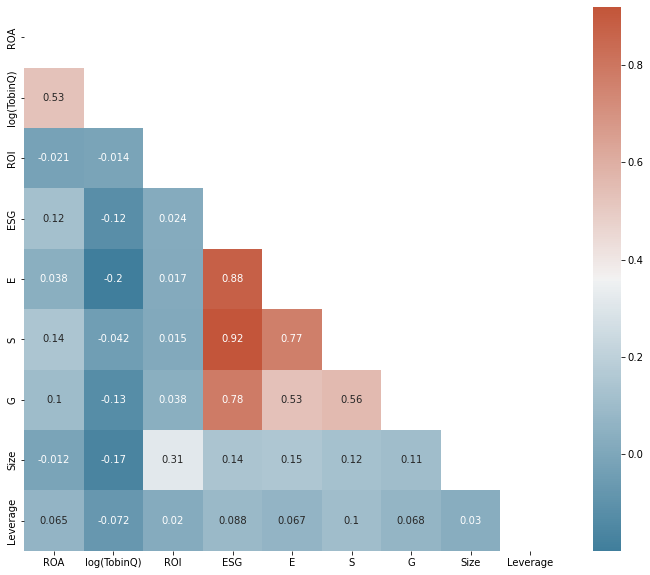

In [11]:

#correlation
df = pd.DataFrame({'ROA': combinedSamples1['ROA'], "log(TobinQ)" : combinedSamples1["log(TobinQ)"] , 'ROI' : combinedSamples1['ROI'], 'ESG' : combinedESG , 'E' : combinedE , 'S' : combinedS ,'G' : combinedG , 'Size' : combinedSamples2['Size'] , 'Leverage' : combinedSamples2['Leverage'] })
corr = df.corr()
f , ax = plt.subplots(figsize= (12,10))
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap = True)
sns.heatmap(corr,annot=True,mask = mask, cmap=cmap)

In [12]:
#regress ROA , Tobin's Q, ROI with the independent variables : Size , leverage, E/S/G/ESG to get the relationship 
model1 = smf.ols('ROA ~ E + Size + Leverage',data = df).fit()
model2 = smf.ols('ROA ~ S + Size + Leverage',data = df).fit()
model3 = smf.ols('ROA ~ G + Size + Leverage',data = df).fit()
model4 = smf.ols('ROA ~ ESG + Size + Leverage',data = df).fit()
model5 = smf.ols('ROI ~ E + Size + Leverage',data = df).fit()
model6 = smf.ols('ROI ~ S + Size + Leverage',data = df).fit()
model7 = smf.ols('ROI ~ G + Size + Leverage',data = df).fit()
model8 = smf.ols('ROI ~ ESG + Size + Leverage',data = df).fit()
model9 = smf.ols('Q("log(TobinQ)") ~ E + Size + Leverage',data = df).fit()
model10 = smf.ols('Q("log(TobinQ)") ~ S + Size + Leverage',data = df).fit()
model11 = smf.ols('Q("log(TobinQ)") ~ G + Size + Leverage',data = df).fit()
model12 = smf.ols('Q("log(TobinQ)") ~ ESG + Size + Leverage',data = df).fit()
#effect of E/S/G/ESG on ROA
print(summary_col([model1,model2,model3,model4]))
#E,S,G all has positive coefficient with p<0.05. S has largest coefficient followed by G then E. coefficient very small in magnitude


                ROA I    ROA II  ROA III  ROA IIII
--------------------------------------------------
E              0.0001                             
               (0.0001)                           
ESG                                       0.0004  
                                          (0.0001)
G                                0.0003           
                                 (0.0001)         
Intercept      0.0560   0.0391   0.0445   0.0420  
               (0.0047) (0.0053) (0.0054) (0.0054)
Leverage       0.0202   0.0164   0.0188   0.0178  
               (0.0077) (0.0076) (0.0077) (0.0077)
R-squared      0.0057   0.0239   0.0143   0.0175  
R-squared Adj. 0.0040   0.0222   0.0126   0.0158  
S                       0.0004                    
                        (0.0001)                  
Size           -0.0003  -0.0005  -0.0004  -0.0005 
               (0.0004) (0.0004) (0.0004) (0.0004)
Standard errors in parentheses.


In [13]:
#effect of E/S/G/ESG on log(Tobin's Q)
print(summary_col([model5,model6,model7,model8]))
#E,S both has negative coefficient with p<0.05. only G has positive coefficient with p < 0.05. 


                ROI I    ROI II  ROI III  ROI IIII
--------------------------------------------------
E              -0.0043                            
               (0.0032)                           
ESG                                       -0.0040 
                                          (0.0043)
G                                0.0007           
                                 (0.0039)         
Intercept      0.4275   0.4710   0.2407   0.4521  
               (0.2443) (0.2820) (0.2858) (0.2873)
Leverage       0.2246   0.2347   0.1854   0.2222  
               (0.4032) (0.4045) (0.4034) (0.4039)
R-squared      0.0999   0.0996   0.0990   0.0994  
R-squared Adj. 0.0984   0.0980   0.0974   0.0979  
S                       -0.0043                   
                        (0.0040)                  
Size           0.3032   0.3018   0.2985   0.3018  
               (0.0219) (0.0218) (0.0218) (0.0219)
Standard errors in parentheses.


In [14]:
#effect of E/S/G/ESG on ROI
print(summary_col([model9,model10,model11,model12]))
#E,S,G all has negative coefficient with p<0.05. S least negative



               Q("log(TobinQ)") I Q("log(TobinQ)") II Q("log(TobinQ)") III Q("log(TobinQ)") IIII
------------------------------------------------------------------------------------------------
E              -0.0047                                                                          
               (0.0006)                                                                         
ESG                                                                        -0.0033              
                                                                           (0.0008)             
G                                                     -0.0034                                   
                                                      (0.0008)                                  
Intercept      0.7668             0.6249              0.7672               0.7470               
               (0.0478)           (0.0561)            (0.0565)             (0.0569)             
Leverage       -0.1917       

In [15]:
#overall, E, S, and G brings negative effect to financial performance. G is the least negative, and E is the most negative.